In [2]:
import pandas as pd 
import numpy as np 
import scipy.stats 
import seaborn as sns
import matplotlib.pyplot as plt

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
features = test.columns.values

for feature in features:
    mean, std = train[feature].mean(), train[feature].std()
    train.loc[:, feature] = (train[feature] - mean) / std
  

In [4]:
for feature in features:
    mean, std = test[feature].mean(), test[feature].std()  
    test.loc[:, feature] = (test[feature] - mean) / std

In [5]:
train.describe()

,FEATURE_0,FEATURE_1,FEATURE_2,FEATURE_3,FEATURE_4,FEATURE_5,FEATURE_6,FEATURE_7,FEATURE_8,FEATURE_9,...,FEATURE_62,FEATURE_63,FEATURE_64,FEATURE_65,FEATURE_66,FEATURE_67,FEATURE_68,FEATURE_69,FEATURE_70,RESOLUTION
count,3.120500e+04,3.120500e+04,3.146200e+04,3.146200e+04,8.010000e+03,8.010000e+03,3.152900e+04,7.515000e+03,3.257600e+04,3.257600e+04,...,3.257600e+04,3.257600e+04,3.231500e+04,3.231500e+04,3.231500e+04,3.231500e+04,3.231500e+04,3.231500e+04,1.617000e+04,32576.000000
mean,1.450068e-16,3.476113e-16,-7.113833e-17,1.560830e-16,-1.857302e-18,-3.548278e-17,1.179768e-16,8.716322e-17,-5.425399e-16,6.584430e-17,...,3.948147e-17,-1.283113e-17,-2.264697e-16,-2.046913e-16,-1.095333e-15,4.868044e-16,-4.235991e-16,-1.509649e-16,1.372777e-16,0.021089
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.143684
min,-9.535458e-01,-8.125447e-01,-1.856262e+00,-4.036410e-01,-5.110112e-01,-3.835754e-01,-1.459942e+00,-6.042637e-01,-8.743053e-02,-2.241542e-02,...,-6.127923e-02,-1.622244e-02,-8.042449e-01,-5.072484e-01,-6.097287e-01,-4.173365e-01,-7.216090e-01,-4.382041e-01,-1.174909e+00,0.000000
25%,-9.535458e-01,-8.125447e-01,-7.278329e-01,-4.034979e-01,-5.080466e-01,-3.803517e-01,-1.007126e+00,-6.042637e-01,-8.743053e-02,-2.190656e-02,...,-2.573830e-02,-1.594916e-02,-8.042449e-01,-5.072484e-01,-6.097287e-01,-4.173365e-01,-7.216090e-01,-4.382041e-01,-9.568532e-01,0.000000
50%,-4.306241e-01,-5.647561e-01,-8.678383e-02,-4.022457e-01,-4.942120e-01,-3.782828e-01,6.027035e-02,-6.042637e-01,-8.743053e-02,-2.088884e-02,...,-2.531317e-02,-1.559524e-02,-2.534985e-01,-5.072484e-01,-6.097287e-01,-4.173365e-01,-7.216090e-01,-4.382041e-01,-2.866047e-01,0.000000
75%,1.085849e+00,7.980807e-01,6.191217e-01,-3.826036e-01,-1.601725e-01,-3.202690e-01,9.826117e-01,1.567444e+00,-8.743053e-02,-1.783566e-02,...,-2.370192e-02,-1.496356e-02,2.972480e-01,6.405516e-01,2.796539e-01,-4.173365e-01,2.642198e-01,-4.382041e-01,1.010453e+00,0.000000
max,1.608771e+00,2.222865e+00,2.732934e+00,2.687538e+00,3.046436e+00,3.773452e+00,1.439018e+00,5.910860e+00,3.457706e+01,1.638803e+02,...,1.347235e+02,1.543752e+02,9.659938e+00,1.785755e+01,1.628854e+01,1.379552e+01,1.110834e+01,1.081672e+01,1.737862e+00,1.000000


In [6]:
train = train.fillna(0)

In [7]:
train.shape[0]-train.count()
X = train.iloc[:, train.columns != 'RESOLUTION']
y= train.iloc[:, train.columns == 'RESOLUTION']

In [8]:
X = np.array(X)
y =np.array(y)

In [9]:
from itertools import cycle
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from scipy import interp
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc

In [10]:
from scipy import interp

In [11]:
model = XGBClassifier()
kfold = StratifiedKFold(n_splits=7, random_state=7)
scoring = 'roc_auc'
results = cross_val_score(model, X, y.ravel(), cv=kfold, scoring = scoring)
print( "AUC: %.3f (%.3f)" % (results.mean(), results.std()) )

AUC: 0.942 (0.011)


In [12]:
fig_size = plt.rcParams["figure.figsize"] 

old_fig_params = fig_size
fig_size[0] = 12
fig_size[1] = 9
   
plt.rcParams["figure.figsize"] = fig_size 

In [13]:
y=y.ravel()

(-0.05, 1.05)

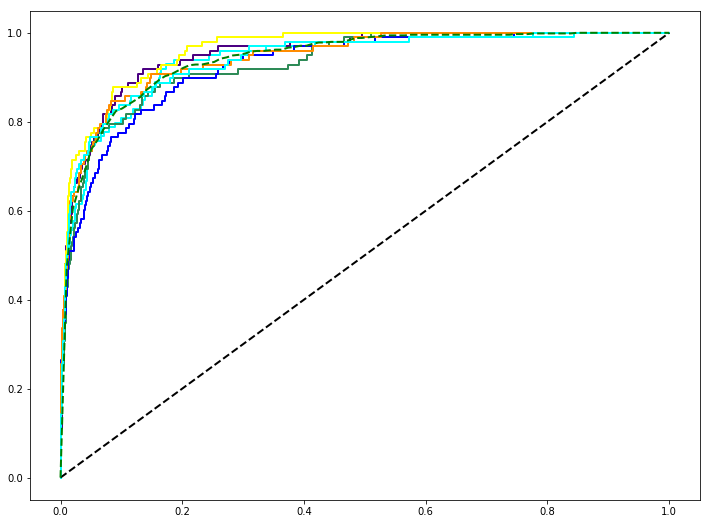

In [14]:
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)

colors = cycle(['cyan', 'indigo', 'seagreen', 'yellow', 'blue', 'darkorange'])
lw = 2

i = 0
for (train, test), color in zip(kfold.split(X, y.ravel()), colors):
    probas_ = model.fit(X[train], y[train]).predict_proba(X[test])
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=lw, color=color,
             label='ROC fold %d (area = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=lw, color='k',
         label='Luck')

mean_tpr /= kfold.get_n_splits(X, y)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='g', linestyle='--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=lw)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

In [17]:
print mean_auc 

0.9414639965041944


In [20]:
test = pd.read_csv('test.csv')
test = test.fillna(0)
for feature in features:
    mean, std = test[feature].mean(), test[feature].std()  
    test.loc[:, feature] = (test[feature] - mean) / std

In [29]:
y_pred = model.predict_proba(data=np.array(test))[: , 1]

In [ ]:
y_pred=np.array(y_pred).astype(int)
np.savetxt('y_pred.csv',y_pred, delimiter=';')

In [30]:
y_pred

array([0.03756703, 0.3154271 , 0.11236342, ..., 0.04772522, 0.8831477 ,
       0.04729057], dtype=float32)

In [ ]:
np.count_nonzero(y_pred == 1)